In [3]:
# Here we will try getting a prediction with LSTM using Keras

# Import key libraries
from help_lib import transform_dataframe, test_classifier, prepare_df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Inputs
source_csv = '/home/andris/GitHub/data/user_teach_stuff.csv'
user_source = '/home/andris/GitHub/data/for_users.csv'

In [4]:
# Read csv into pandas dataframe
df = pd.read_csv(source_csv)
df = df.groupby(['user_id','event_leg']).sum()

# Extract the events that occured after user registration 
df_1 = df[df.index.get_level_values(1)>-1] # Activities following user registration

# --------------------------------------------------------------------
# Extract the events that happened before user registration, sum them and set event_leg at 0 
# --------------------------------------------------------------------

rep_features = ['grp_add_assig','grp_add_user','tch_add_assig','tch_add_user','tch_attempt','tch_create_group','tch_view_assig_prog']
month_array = range(int(min(df.index.get_level_values(1))),0)
df_2 = df[df.index.get_level_values(1).isin(month_array)]
df_2 = df_2.reset_index().groupby('user_id').sum()[rep_features]
df_2.columns = df_2.columns + '_tot'
df_2['event_leg'] = np.zeros(len(df_2.index))
df_2 = df_2.groupby(['user_id','event_leg']).sum()

# Add these new features to the user dataframe
for rep in rep_features:
    df_1[rep + '_tot'] = df_1[rep]
df_1 = df_1.add(df_2, fill_value=0)

# Do a cumulative sum on the features
for rep in rep_features:
    df_1[rep + '_tot'] = df_1.groupby('user_id')[rep + '_tot'].cumsum()
    
# --------------------------------------------------------------------
# Find the user churn from the users dataframe
# --------------------------------------------------------------------

# Loading the dataframe
df_user = pd.read_csv(user_source)
df_user = df_user.set_index('user_id')

# Determining the month of last activity
df_churn = np.floor((pd.to_datetime(df_user['last_seen'])  - pd.to_datetime(df_user['registration_date'])).dt.total_seconds()/(3600*24*30))
df_churn = df_churn.rename('churn_leg')

# Adding churn to the big dataframe
df = df_1.reset_index().set_index('user_id').join(df_churn)

# Eliminating events that occur after user churn
df = df[df['event_leg']<=df['churn_leg']]

# Cleaning up
df = df.drop('churn_leg',axis=1)
df = df.groupby(['user_id','event_leg']).sum()

# Printing finalised dataframe
df.head()

/home/andris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


grp_add_assig  \
user_id                                            event_leg                  
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                  0.0   
                                                   1.0                  0.0   
                                                   2.0                  0.0   
                                                   3.0                  0.0   
                                                   4.0                  0.0   

                                                              grp_add_assig_tot  \
user_id                                            event_leg                      
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                      0.0   
                                                   1.0                      0.0   
                                                   2.0                      0.0   
                                                   3.0                      0.0   
                                                   4.0                      0.0   

                                                              grp_add_user  \
user_id                                            event_leg                 
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   

                                                              grp_add_user_tot  \
user_id                                            event_leg                     
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   

                                                              grp_added  \
user_id                                            event_leg              
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   

                                                              play_video  \
user_id                                            event_leg               
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0               1.0   
                                                   1.0               0.0   
                                                   2.0               0.0   
                                                   3.0               0.0   
                                                   4.0               0.0   

                                                              q_lvl_0  \
user_id                                            event_leg            
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0          321.0   
                                                   1.0           50.0   
                                                   2.0          108.0   
                                                   3.0           34.0   
                                                   4.0           29.0   

                                                              q_lvl_0_cor  \
user_id                                            event_leg                
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              137.0   
  

In [5]:
df.head()

grp_add_assig  \
user_id                                            event_leg                  
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                  0.0   
                                                   1.0                  0.0   
                                                   2.0                  0.0   
                                                   3.0                  0.0   
                                                   4.0                  0.0   

                                                              grp_add_assig_tot  \
user_id                                            event_leg                      
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                      0.0   
                                                   1.0                      0.0   
                                                   2.0                      0.0   
                                                   3.0                      0.0   
                                                   4.0                      0.0   

                                                              grp_add_user  \
user_id                                            event_leg                 
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   

                                                              grp_add_user_tot  \
user_id                                            event_leg                     
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   

                                                              grp_added  \
user_id                                            event_leg              
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              0.0   
                                                   1.0              0.0   
                                                   2.0              0.0   
                                                   3.0              0.0   
                                                   4.0              0.0   

                                                              play_video  \
user_id                                            event_leg               
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0               1.0   
                                                   1.0               0.0   
                                                   2.0               0.0   
                                                   3.0               0.0   
                                                   4.0               0.0   

                                                              q_lvl_0  \
user_id                                            event_leg            
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0          321.0   
                                                   1.0           50.0   
                                                   2.0          108.0   
                                                   3.0           34.0   
                                                   4.0           29.0   

                                                              q_lvl_0_cor  \
user_id                                            event_leg                
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0              137.0   
  

In [6]:
last_month = 4;

# Find users that have churned
plot_churn = df.reset_index().groupby('user_id')['event_leg'].max()

# Remove users that have churned before last month
plot_churn = plot_churn[plot_churn.values >= last_month]
df_lm = df.loc[plot_churn.index.values]

# Remove rows all greater than last_month + 1
df_lm = df_lm[df_lm.index.get_level_values(1)<=last_month]
plot_churn =plot_churn.loc[np.unique(df_lm.index.get_level_values(0).values)]

# Label those that churned at last month
label = [1 if item == last_month else 0 for item in plot_churn.values]
df_lm = df_lm.loc[plot_churn.index.values]

# CLean off any nan
df_lm = df_lm.fillna(0)

# Display the dataframe
df_lm.head(10)

grp_add_assig  \
user_id                                            event_leg                  
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                  0.0   
                                                   1.0                  0.0   
                                                   2.0                  0.0   
                                                   3.0                  0.0   
                                                   4.0                  0.0   
001209cc56f8583d638502e7446dd7461278082d613d4c6... 0.0                  0.0   
                                                   1.0                  1.0   
                                                   2.0                  0.0   
                                                   4.0                  0.0   
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45e... 0.0                 16.0   

                                                              grp_add_assig_tot  \
user_id                                            event_leg                      
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                      0.0   
                                                   1.0                      0.0   
                                                   2.0                      0.0   
                                                   3.0                      0.0   
                                                   4.0                      0.0   
001209cc56f8583d638502e7446dd7461278082d613d4c6... 0.0                      5.0   
                                                   1.0                      6.0   
                                                   2.0                      6.0   
                                                   4.0                      6.0   
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45e... 0.0                     16.0   

                                                              grp_add_user  \
user_id                                            event_leg                 
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                 0.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   3.0                 0.0   
                                                   4.0                 0.0   
001209cc56f8583d638502e7446dd7461278082d613d4c6... 0.0                 2.0   
                                                   1.0                 0.0   
                                                   2.0                 0.0   
                                                   4.0                 0.0   
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45e... 0.0                28.0   

                                                              grp_add_user_tot  \
user_id                                            event_leg                     
0009111939b7d071597369a67002b22853c08e19f463cf2... 0.0                     0.0   
                                                   1.0                     0.0   
                                                   2.0                     0.0   
                                                   3.0                     0.0   
                                                   4.0                     0.0   
001209cc56f8583d638502e7446dd7461278082d613d4c6... 0.0                     5.0   
                                                   1.0                     5.0   
                                                   2.0                     5.0   
                                                   4.0                     5.0   
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45e... 0.0                    28.0   

                                                              grp_added  \
user_id                                            event_leg              
0009111939b7d071597369a67002b22853c08e19f463

In [7]:
len(df_lm.reset_index().groupby('user_id').sum().index.values)


4860

(array([ 4269.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   591.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

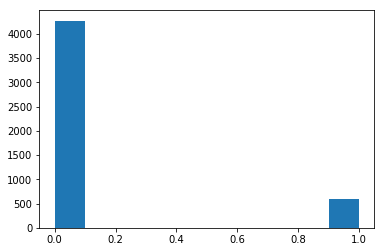

In [8]:
plt.hist(label)

In [9]:
# Converting to Keras readible format

users = df_lm.reset_index().groupby('user_id').sum().index.values

solver_array = [];

for user in users:

    solver_array.append(list(df_lm.loc[user].apply(tuple, axis=1).apply(list)))


In [14]:
from keras.preprocessing.sequence import pad_sequences

try_array = solver_array


df_test = pd.Series(pad_sequences(try_array, 5).tolist()).apply(np.asarray)

In [85]:
df_test

0       [[0, 0, 0, 0, 0, 1, 321, 137, 4, 2, 0, 0, 0, 0...
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2       [[16, 16, 28, 28, 28, 8, 0, 0, 20, 60, 0, 0, 0...
3       [[0, 0, 0, 0, 0, 0, 19, 19, 0, 0, 0, 0, 0, 0, ...
4       [[4, 5, 13, 19, 13, 0, 56, 37, 0, 0, 0, 0, 0, ...
5       [[4, 4, 40, 40, 40, 0, 148, 148, 0, 0, 0, 0, 0...
6       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
7       [[4, 4, 11, 12, 11, 0, 19, 50, 0, 0, 0, 0, 0, ...
8       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
9       [[0, 0, 0, 0, 0, 0, 22, 67, 0, 0, 0, 0, 0, 0, ...
10      [[0, 9, 18, 117, 18, 0, 288, 90, 0, 0, 0, 0, 0...
11      [[176, 304, 816, 2512, 816, 304, 0, 0, 448, 51...
12      [[4, 4, 332, 332, 332, 0, 20, 112, 0, 0, 32, 3...
13      [[0, 0, 0, 0, 0, 0, 137, 39, 0, 0, 0, 0, 0, 0,...
14      [[4, 4, 68, 68, 68, 80, 0, 0, 72, 96, 0, 0, 0,...
15      [[0, 0, 0, 0, 0, 0, 105, 87, 0, 0, 0, 0, 0, 0,...
16      [[12, 12, 60, 60, 60, 0, 520, 556, 0, 0, 0, 0,...
17      [[0, 0

In [15]:
X_init = np.asarray(df_test)
len(X_init)

4860

In [16]:

X = np.hstack(X_init).reshape(len(users),len(df_test[0]),len(df_test[0][0]))
y = np.hstack(np.asarray(label)).reshape(len(X),1)


(array([ 4269.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   591.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

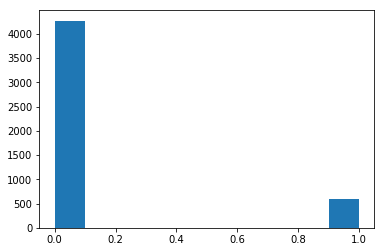

In [17]:
plt.hist(y)

In [18]:
input_length = X.shape[1]
input_dim = X.shape[2]
output_dim = len(y[0])

In [77]:
# Building the network model
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.models import Sequential
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense

def create_model(input_length, input_dim, output_dim):
    print ('Creating model...')
    model = Sequential()
    #model.add(Embedding(input_dim = 33, output_dim = 50, input_length = input_length))
    #model.add(LSTM(200, input_shape = (5,33),  return_sequences=True))
    model.add(LSTM(600, activation='sigmoid', inner_activation='hard_sigmoid', input_dim = input_dim, input_length = input_length))
    #model.add(Dropout(0.5))
    #model.add(LSTM(300, input_dim = input_dim, input_length = input_length))
    #model.add(LSTM(300, activation='sigmoid', inner_activation='hard_sigmoid'))
    #model.add(Dropout(0.5))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(output_dim, activation='sigmoid'))


    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop')
    return model

In [20]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(label), label)
class_weight

array([ 0.56921996,  4.11167513])

In [66]:
model = create_model(len(X[0]))

hist = model.fit(X,y, batch_size=128, nb_epoch=20, verbose = 1,class_weight={0:0.569,1:4.112},validation_split=0.1)

TypeError: create_model() missing 2 required positional arguments: 'input_dim' and 'output_dim'

In [72]:
model.evaluate(X,y,batch_size=7)

4860/4860 [==============================] - 10s 2ms/step


[0.41297221085125652, 0.84423869197015411]

In [73]:
y_pred = model.predict_classes(X)

4860/4860 [==============================] - 5s 1ms/step


(array([ 4269.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   591.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

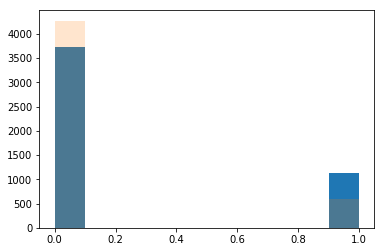

In [75]:
plt.hist(y_pred)
plt.hist(y,alpha=0.2)

In [76]:
y_score = model.predict_proba(X)

4860/4860 [==============================] - 4s 924us/step


In [55]:
from sklearn.metrics import roc_curve, confusion_matrix

# Let's plot an ROC curve
fpr, tpr, thresholds = roc_curve(y,y_score,pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

ValueError: Found input variables with inconsistent numbers of samples: [4860, 972]

In [82]:
confusion_matrix(y,y_pred)

array([[3619,  650],
       [ 107,  484]])

In [83]:
def create_MLP(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, init='uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop')

In [22]:
from sklearn.model_selection import train_test_split

# Splitting into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(label), label)
class_weight

array([ 0.56921996,  4.11167513])

In [78]:
input_length = X_train.shape[1]
input_dim = X_train.shape[2]
output_dim = len(y_train[0])

model = create_model(input_length, input_dim, output_dim)

hist = model.fit(X_train,y_train, batch_size=128, nb_epoch=10, verbose = 1,class_weight={0:0.569,1:4.112})

Creating model...


/home/andris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/home/andris/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(600, activation="sigmoid", input_shape=(5, 33), recurrent_activation="hard_sigmoid")`
  if sys.path[0] == '':


Compiling...


/home/andris/anaconda/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
3888/3888 [==============================] - 9s 2ms/step - loss: 0.7559
Epoch 2/10
3888/3888 [==============================] - 8s 2ms/step - loss: 0.7020
Epoch 3/10
3888/3888 [==============================] - 8s 2ms/step - loss: 0.6838
Epoch 4/10
3888/3888 [==============================] - 8s 2ms/step - loss: 0.6684
Epoch 5/10
3888/3888 [==============================] - 9s 2ms/step - loss: 0.6645
Epoch 6/10
3888/3888 [==============================] - 9s 2ms/step - loss: 0.6557
Epoch 7/10
3888/3888 [==============================] - 9s 2ms/step - loss: 0.6464
Epoch 8/10
3888/3888 [==============================] - ETA: 0s - loss: 0.636 - 8s 2ms/step - loss: 0.6355
Epoch 9/10
3888/3888 [==============================] - 8s 2ms/step - loss: 0.6229
Epoch 10/10
3888/3888 [==============================] - 8s 2ms/step - loss: 0.6156


In [79]:
y_score = model.predict_proba(X_test)
y_pred = model.predict_classes(X_test)

972/972 [==============================] - 1s 988us/step


972/972 [==============================] - 3s 3ms/step


0.58094881766249618

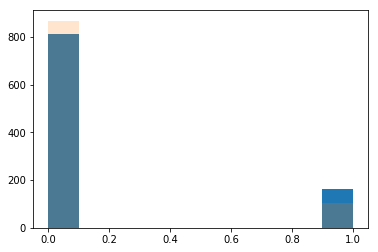

In [80]:
plt.hist(y_pred)
plt.hist(y_test, alpha=0.2)

model.evaluate(X_test,y_test,batch_size=7)

Text(0,0.5,'True positive rate')

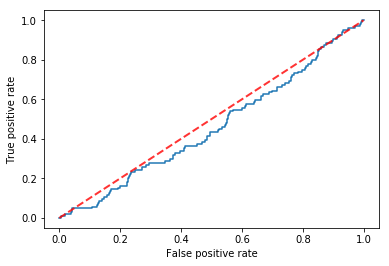

In [81]:
# Let's plot an ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_score)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.83      0.86       868
          1       0.09      0.13      0.11       104

avg / total       0.80      0.76      0.78       972



In [47]:
def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    #model.add(Embedding(100, 64, input_length = input_length))
    model.add(LSTM(33,66, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
    #model.add(Dropout(0.5))
    #model.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid'))
    #model.add(Dropout(0.5))
    #model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [48]:
model = create_model(len(X_train[0]))
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=10, validation_split = 0.1, verbose = 1)

Creating model...


TypeError: `LSTM` can accept only 1 positional arguments ('units',), but you passed the following positional arguments: [33, 66]

In [43]:
X_train.shape

(3888, 5, 33)

In [76]:
output_dim

1